# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [5]:

m = 1 #cash-on-hand
v = 10 #disutility of labor
eps = 0.3 #elasticity of labor supply
tau_0 = 0.4 #standard labor income tax
tau_1 = 0.1 #top bracket labor income tax
kappa = 0.4 #cut-off for top labor income tax


# Defining utility

def utility(c,v,l,eps):
    u = np.log(c) - v*(l**(1+1/eps)/(1+1/eps))
    return u

# Defining constraint

def eq(m,w,l,tau_0,tau_1,kappa):
    x = m + w*l - (tau_0*w*l + tau_1*np.max(w*l-kappa,0))
    return x


def choice(l,w,eps,v,tau_0,tau_1,kappa):
    c = eq(m,w,l,tau_0,tau_1,kappa)
    return -utility(c,v,l,eps)


def optimizer(w,eps,v,tau_0,tau_1,kappa,m):
    res = optimize.minimize_scalar(
    choice, method='bounded',
    bounds=(0,1), args=(w,eps,v,tau_0,tau_1,kappa))
    
    l_star = res.x
    c_star = eq(m,w,l_star,tau_0,tau_1,kappa)
    utility_star = (c_star,l_star,v,eps)
    
    return l_star,c_star,utility_star

l_star = optimizer(0.5,eps,v,tau_0,tau_1,kappa,m)[0]
c_star = optimizer(0.5,eps,v,tau_0,tau_1,kappa,m)[1]
u_star = optimizer(0.5,eps,v,tau_0,tau_1,kappa,m)[2]

print('labour supply is:' + str(l_star))
print('consumption is:' + str(c_star))
print('utility:' +  str(u_star))



labour supply is:0.31961536193545265
consumption is:1.119903840483863
utility:(1.119903840483863, 0.31961536193545265, 10, 0.3)


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

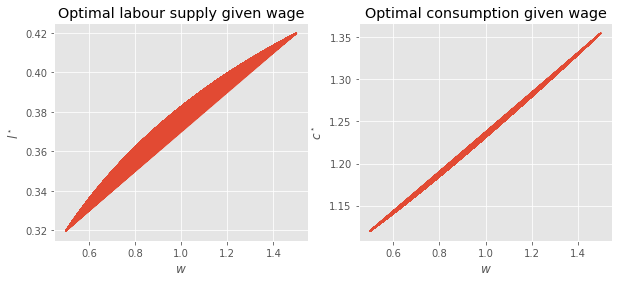

In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

N=10000
w_vec = np.random.uniform(0.5, 1.5, size=N)
l_opt = np.empty(N)
c_opt = np.empty(N)

for i,w in enumerate(w_vec):
    opt = optimizer(w,eps,v,tau_0,tau_1,kappa,m)
    l_opt[i] = opt[0]
    c_opt[i] = opt[1]
    
fig = plt.figure(figsize=(10,4))

ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_opt)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_opt)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show

# Question 3

ADD ANSWER.

In [4]:
for i,w in enumerate(w_vec):
    opt = optimizer(w,eps,v,tau_0,tau_1,kappa,m)
    l_opt[i] = opt[0]
    
tax = lambda l_opt, w_vec: m + w_vec*l_opt - (tau_0*w_vec*l_opt + tau_1*np.max(w_vec*l_opt-kappa,0))
tax_rev=tax(l_opt,w_vec)
print(tax)
np.sum(tax_rev)

# Question 4

ADD ANSWER.

In [5]:
eps_new = 0.1 

for i,w in enumerate(w_vec):
    opt = optimizer(w,eps_new,v,tau_0,tau_1,kappa,m)
    l_opt[i] = opt[0]
    
tax = lambda l_opt, w_vec: m + w_vec*l_opt - (tau_0*w_vec*l_opt + tau_1*np.max(w_vec*l_opt-kappa,0))
tax_rev_new=tax(l_opt,w_vec)
print(tax)
np.sum(tax_rev_new)




# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.